In [8]:
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
figsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10


In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


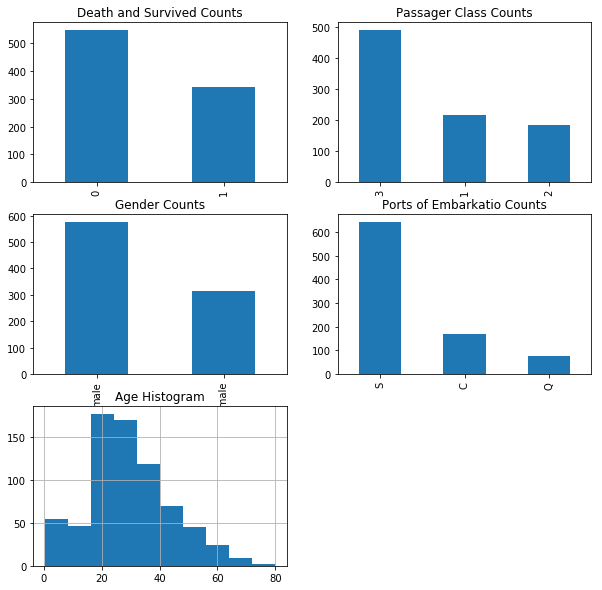

In [9]:
# Set up a grid of plots
fig=plt.figure(figsize=figsize_with_subplots)
fig_dims=(3,2)
# Plot death and survical counts
plt.subplot2grid(fig_dims,(0,0))
df_train['Survived'].value_counts().plot(kind='bar',title='Death and Survival Counts')
# Plot Pclass counts
plt.subplot2grid(fig_dims,(0,1))
df_train['Pclass'].value_counts().plot(kind='bar',title='Passenger Class Counts')
# Plot sex counts
plt.subplot2grid(fig_dims,(1,0))
df_train['Sex'].value_counts().plot(kind='bar',title='Gender Counts')
# Plot Embarked counts
plt.subplot2grid(fig_dims,(1,1))
df_train['Embarked'].value_counts().plot(kind='bar',title='Ports of Embarkatio Counts')
#Plot the Age histogram
plt.subplot2grid(fig_dims,(2,0))
df_train['Age'].hist()
plt.title('Age Histogram')

# 特征工程
从我们之前的数据探索分析中，可以看到乘客登机有三类：一等，二等，三等。我们将根据乘客等级确定幸存比例。
产生 乘客等级和幸存者的交叉表

In [10]:
pclass_xt=pd.crosstab(df_train['Pclass'],df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


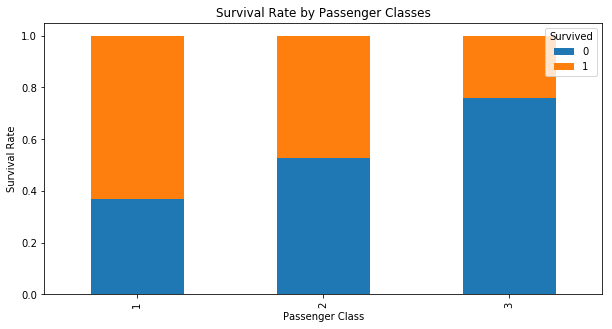

In [11]:
# Normalise the cross tab to sum to 1
pclass_xt_pct=pclass_xt.div(pclass_xt.sum(1).astype(float),axis=0)
pclass_xt_pct.plot(kind='bar',stacked=True,
                  title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

我们可以发现乘客等级似乎对于能否幸存有很大的影响，一等乘客更有可能幸存下来。

## 性别特征
性别在决定一个乘客是否幸存时也起了重要的作用。我们需要把性别从字符串映射成数字，以便于应用机器学习算法。

把性别从字符串形式映射为数字格式:

In [12]:
sexes=sorted(df_train['Sex'].unique())
genders_mapping=dict(zip(sexes,range(0,len(sexes)+1)))
genders_mapping

{'female': 0, 'male': 1}

In [13]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


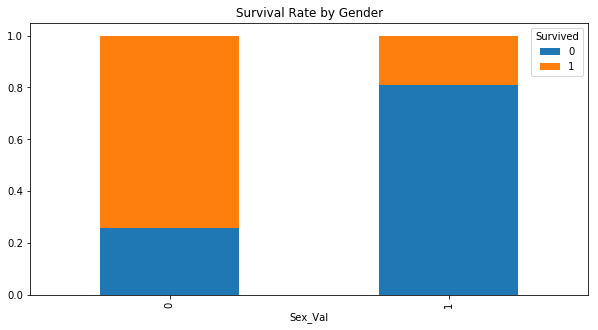

In [15]:
sex_val_xt=pd.crosstab(df_train['Sex_Val'],df_train['Survived'])
sex_val_xt_pct=sex_val_xt.div(sex_val_xt.sum(1).astype(float),axis=0)
sex_val_xt_pct.plot(kind='bar',stacked=True,title='Survival Rate by Gender')

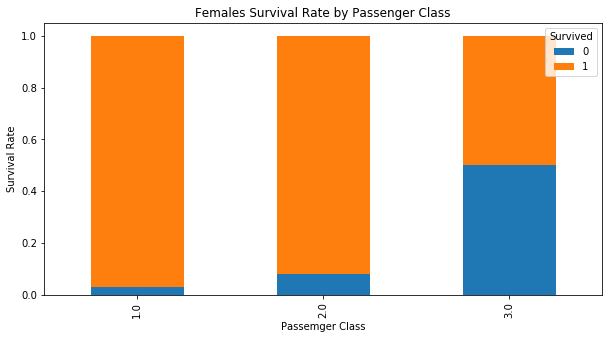

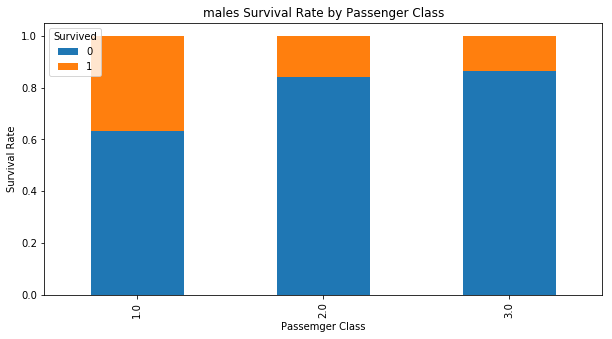

In [22]:
females_df=df_train[df_train['Sex']=='female']
females_xt=pd.crosstab(females_df['Pclass'],df_train['Survived'])
females_xt_pct=females_xt.div(females_xt.sum(1).astype(float),axis=0)
females_xt_pct.plot(kind='bar',stacked=True,title='Females Survival Rate by Passenger Class')
plt.xlabel('Passemger Class')
plt.ylabel('Survival Rate')
#
males_df=df_train[df_train['Sex']=='male']
males_xt=pd.crosstab(males_df['Pclass'],df_train['Survived'])
males_xt_pct=males_xt.div(males_xt.sum(1).astype(float),axis=0)
males_xt_pct.plot(kind='bar',stacked=True,title='males Survival Rate by Passenger Class')
plt.xlabel('Passemger Class')
plt.ylabel('Survival Rate')

可以发现，一等二等乘客中大部分女士幸存了，一等乘客中男士有更大的可能性幸存。
## Embarked 特征

Embarked列可能也是重要的特征，但是有一些缺失值，应用机器学习算法时有可能产生问题。

In [23]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [25]:
# Get the unique values of Embarked
embarked_locs=sorted(df_train['Embarked'].unique())
embarked_locs_mapping=dict(zip(embarked_locs,range(0,len(embarked_locs)+1)))
embarked_locs_mapping
df_train['Embarked_Val'] = df_train['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3


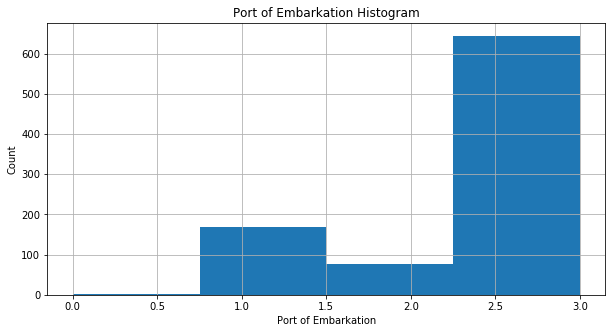

In [30]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs),range=(0,3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

未完待续……